In [1]:
import numpy as np
import pandas as pd
import random
import cv2
import os

from PIL import Image as Pil_Img
from PIL.ExifTags import TAGS
from IPython.display import Image

#### Extract EXIF Data:

Extract EXIF data from image using Python Imaging Library.

In [2]:
def get_exif(fn):
    ret = {}
    i = Pil_Img.open(fn)
    info = i._getexif()
    for tag, value in info.items():
        decoded = TAGS.get(tag, tag)
        ret[decoded] = value
    return ret

#### Image Test:

Randomly select an image from the directory and show exif data with image file to verify `get_exif` function operation.

/home/ubuntu/project-5/data/images/bucks/buck0506.jpg
{'ImageWidth': 4368, 'ImageLength': 2912, 'BitsPerSample': (8, 8, 8), 'PhotometricInterpretation': 2, 'ResolutionUnit': 2, 'ExifOffset': 288, 'Make': 'Canon', 'Model': 'Canon EOS 5D', 'Software': 'Adobe Photoshop CS6 (Macintosh)', 'Orientation': 1, 'DateTime': '2013:11:14 14:42:14', 'YCbCrPositioning': 2, 'SamplesPerPixel': 3, 'XResolution': (720000, 10000), 'YResolution': (720000, 10000), 'ExifVersion': b'0221', 'ComponentsConfiguration': b'\x01\x02\x03\x00', 'ShutterSpeedValue': (327680, 65536), 'DateTimeOriginal': '2006:11:30 06:56:05', 'DateTimeDigitized': '2006:11:30 06:56:05', 'ApertureValue': (221184, 65536), 'ExposureBiasValue': (0, 1), 'MaxApertureValue': (3, 1), 'MeteringMode': 5, 'Flash': 16, 'FocalLength': (400, 1), 'UserComment': b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x0

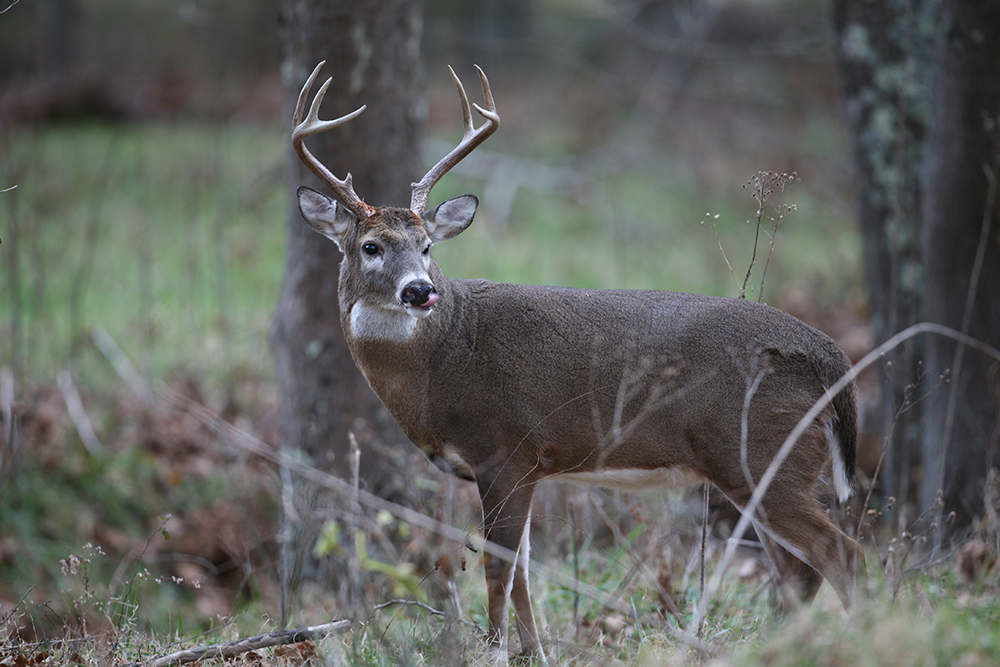

In [52]:
path = '/home/ubuntu/project-5/data/images/bucks/'

ftest = random.sample(os.listdir(path), k = 1)
ftest = path + ftest[0]
print(ftest)
pic = get_exif(ftest)
print(pic)
Image(filename = ftest)

#### Create Dataframe from EXIF data:

* Convert exif data format to dictionary 
* Load dictionary to DataFrame and remove null values
* Export DataFrame to csv format for Tableau

In [53]:
exif_pics = dict()
path = '/home/ubuntu/project-5/data/images/test/'
exif_list = ['Make', 'Model', 'DateTime', 'Flash', 'LightSource']
no_exif, dict_idx = 0, 0

for idx, photo in enumerate(os.listdir(path)):
    fname = path + photo
    try:
        pic = get_exif(fname)
        exif_pics[idx] = {k: pic[k] for k in exif_list if k in pic}
    except:
        no_exif += 1
        
df = pd.DataFrame(exif_pics)
df = df.T
df = df.reset_index(drop = True)
df = df.dropna(subset = ['DateTime'])
df.head(15)

,DateTime,Flash,LightSource,Make,Model
0,2013:11:04 13:07:44,NaN,NaN,NaN,NaN
1,2014:09:06 18:42:06,31,0,NIKON CORPORATION,NIKON D90
4,2014:07:25 17:36:22,16,NaN,Canon,Canon EOS 50D
5,2014:08:13 11:38:29,NaN,NaN,NaN,NaN
7,2009:02:07 09:56:36,16,NaN,Canon,Canon EOS 40D
10,2008:04:18 21:35:23,16,NaN,Canon,Canon EOS 20D
13,2016:10:24 15:54:49,0,0,NIKON CORPORATION,NIKON D700
15,2017:10:13 09:28:48,16,0,NIKON CORPORATION,NIKON D40
16,2011:11:17 18:36:46,NaN,NaN,NaN,NaN
17,2016:03:15 18:00:27,16,4,NIKON CORPORATION,NIKON D7100


In [54]:
df.to_csv(path_or_buf = '/home/ubuntu/project-5/df_exif.csv')